In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10) # set default size of plots

## Загрузим изображение

In [3]:
image = plt.imread("./test_image.jpg")
image.shape

(194, 259, 3)

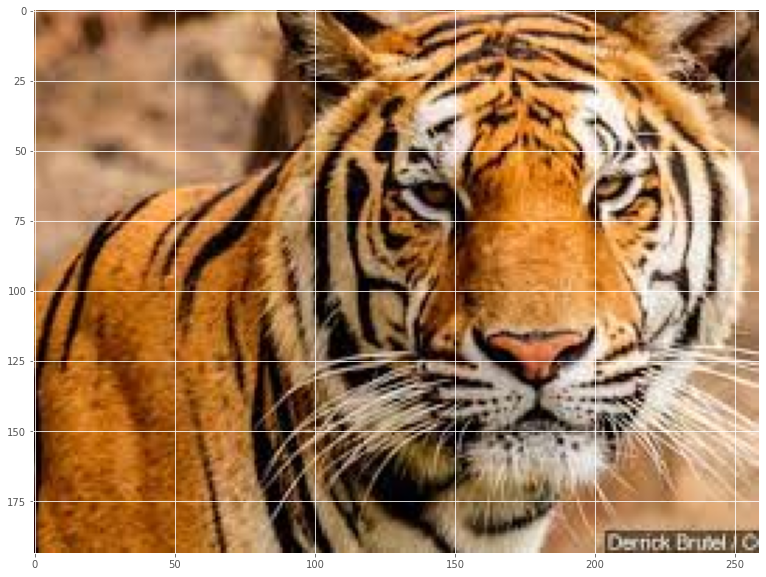

In [4]:
plt.imshow(image)

## Свёртки

Реализуйте функцию применяющую ядро kernel к изображению input_image. Для простоты, не будем делать padding, зафиксируем stride равным единице, а ядро свёртки будем считать квадратной матрицей (не трёхмерным тензором!) и приминять к каждому каналу независимо.

In [5]:
def conv2d(input_image, kernel):
    h, w, d = input_image.shape
    k_h, k_w = kernel.shape
    new_image = np.zeros((h-k_h + 1, w - k_w + 1, d))
   
    # Впишите свой код на месте заглушки
    for i in range(h - k_h + 1):
        
        for j in range(w - k_w + 1):
            
            for k in range(d):
                
                new_image[i:i+k_h, j:j+k_w, k] = np.sum(kernel * input_image[i:i+k_h, j:j+k_w, k])
                
                
    return new_image     

Опишите ядро свёртки, выполняющее тождественное преобразование

In [6]:
identity_kernel = np.zeros((3,3))
identity_kernel[1,1] = 1
identity_kernel

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [7]:
same_image = conv2d(image, identity_kernel)

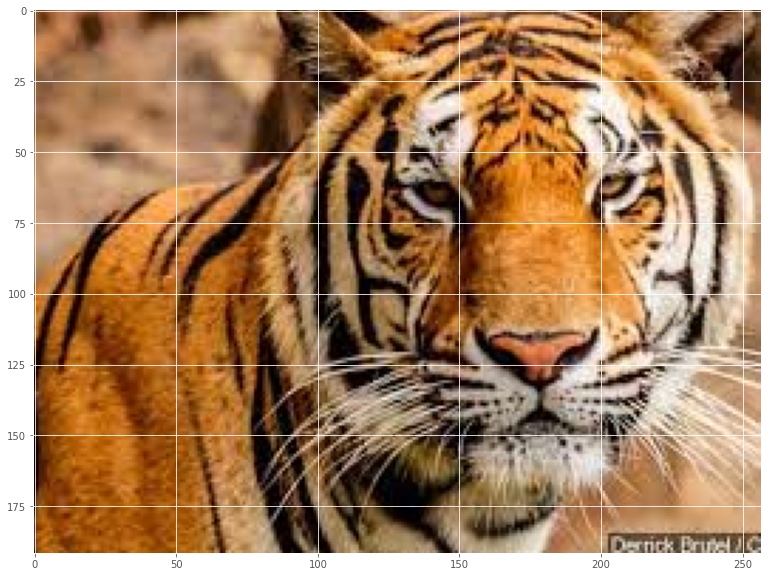

In [8]:
plt.imshow(same_image.astype(np.uint8))
plt.savefig('./same_image.jpg')

Опишите ядро свёртки, выполняющее размытие

In [9]:
blur_kernel = np.exp(np.zeros((3,3)))
blur_kernel = 1/10 * blur_kernel
blur_kernel

array([[0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1]])

In [10]:
blurry_image =  conv2d(image, blur_kernel)

In [11]:
blurry_image.shape

(192, 257, 3)

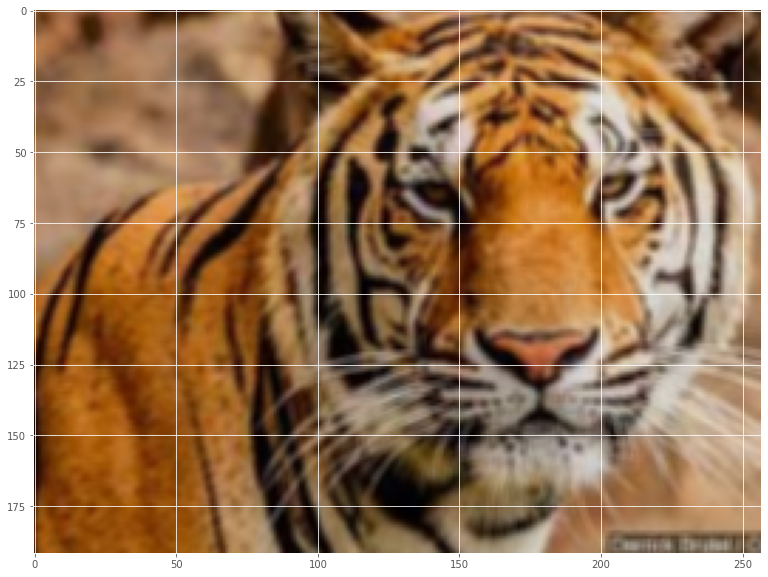

In [12]:
plt.imshow(blurry_image.astype(np.uint8))
plt.savefig('./blurry_image.jpg')

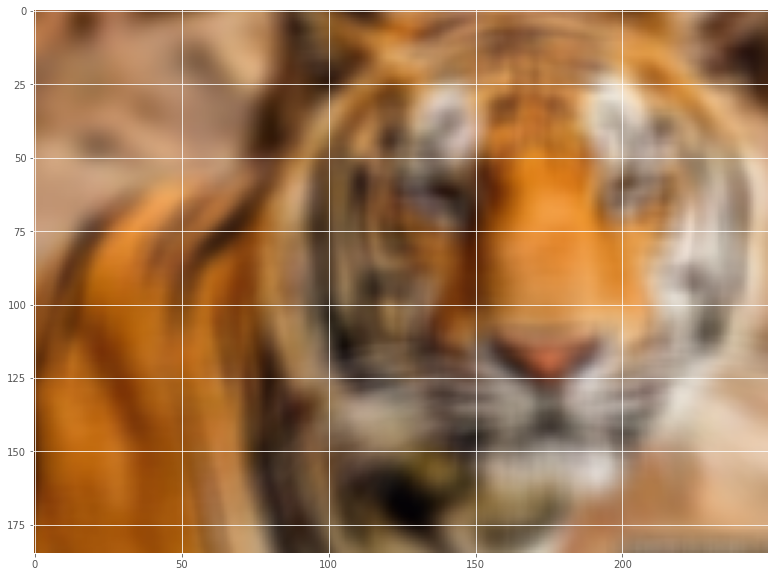

In [13]:
strong_blur_kernel = np.exp(np.zeros((10,10)))
strong_blur_kernel = 1/100 * strong_blur_kernel

strong_blur_image = conv2d(image, strong_blur_kernel)
plt.imshow(strong_blur_image.astype(np.uint8))
plt.savefig('./strong_blur_image.jpg')

А теперь подсветите границы объектов на изображении

In [14]:
edge_kernel_1 = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) # Sobel
edge_kernel_2 = edge_kernel_1.T

In [15]:
edge_image_1 = conv2d(image, edge_kernel_1)
edge_image_2 = conv2d(image, edge_kernel_2)
edge_image = np.sqrt(np.square(edge_image_1) + np.square(edge_image_2)) 

In [16]:
mean_depth_wise = np.mean(edge_image, axis = 2)
for i in range(edge_image.shape[2]):
    edge_image[:, :, i] = mean_depth_wise
edge_image = edge_image * 255 / np.max(edge_image)

In [17]:
print('max', edge_image.max(), 'min', edge_image.min())

max 255.0 min 0.5674593264216043


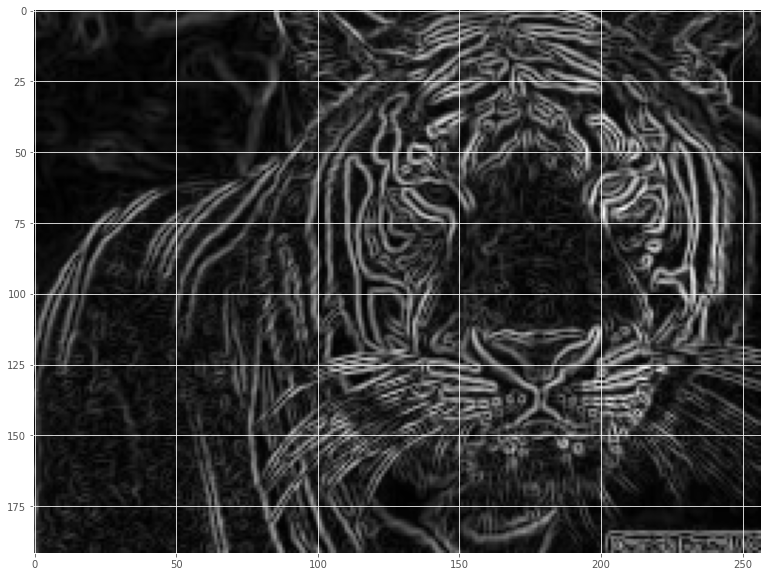

In [18]:
plt.imshow(edge_image.astype(np.uint8), cmap = 'gray')
plt.savefig('./edge_image.jpg')

In [19]:
edge_image.shape

(192, 257, 3)

# My own image
```'road_image.jpg'```

In [20]:
my_image = plt.imread("./road_image.jpg")
my_image.shape

(1620, 1080, 3)

I'll just do edge detection

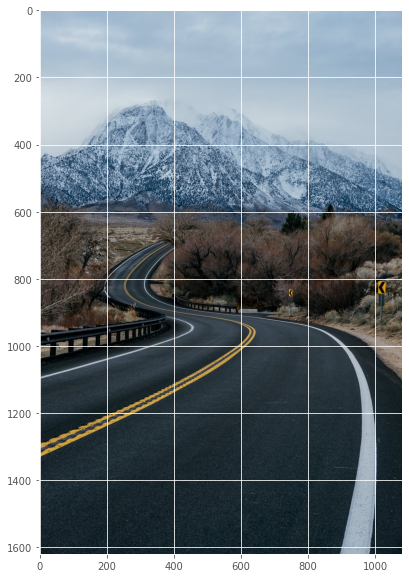

In [21]:
plt.imshow(my_image)

In [22]:
edge_1 = conv2d(my_image, edge_kernel_1)
edge_2 = conv2d(my_image, edge_kernel_2)
edge_my_image = np.sqrt(np.square(edge_1) + np.square(edge_2))

In [23]:
mean_depth_wise = np.mean(edge_my_image, axis = 2)
for i in range(edge_my_image.shape[2]):
    edge_my_image[:, :, i] = mean_depth_wise
edge_my_image = edge_my_image * 255 / np.max(edge_my_image)

In [24]:
print('max', edge_my_image.max(), 'min', edge_my_image.min())

max 255.0 min 0.0


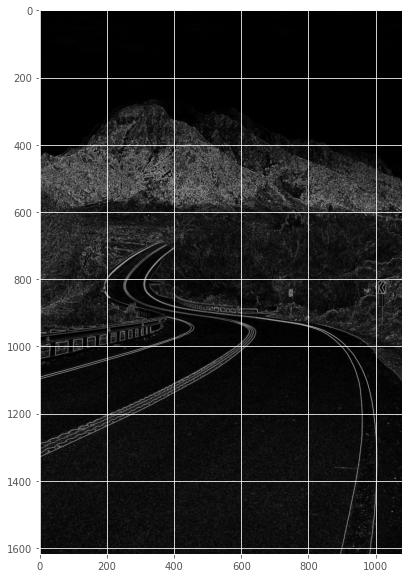

In [25]:
plt.imshow(edge_my_image.astype(np.uint8), cmap = 'gray')
plt.savefig('./edge_my_image.jpg')